## k-Nearest Neighbors

### Task:
Using the k-Nearest Neighbors algorithm predict 

In [22]:
# import libraries
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [19]:
#import data from local directory
df = pd.read_csv("dataset/diabetes.csv")
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Visualization and Exploration

In [3]:
# Display data information
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Print the first 5 rows to check the data
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

0    500
1    268
Name: Outcome, dtype: int64


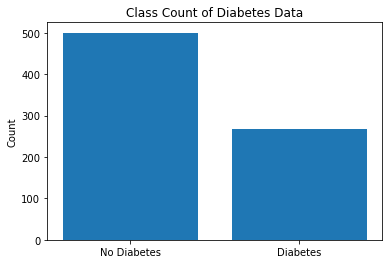

In [10]:
# Print class count of the target variable
print(df['Outcome'].value_counts())

# Visualize class count of the target variable
plt.bar(df['Outcome'].value_counts().index, df['Outcome'].value_counts().values)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('Count')
plt.title('Class Count of Diabetes Data')
plt.show()

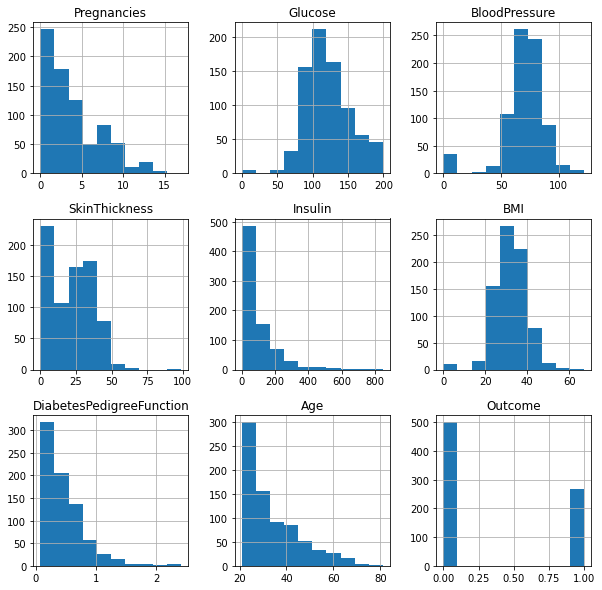

In [7]:
# Visualize the distribution of each variable using histograms
df.hist(figsize=(10, 10))
plt.show()

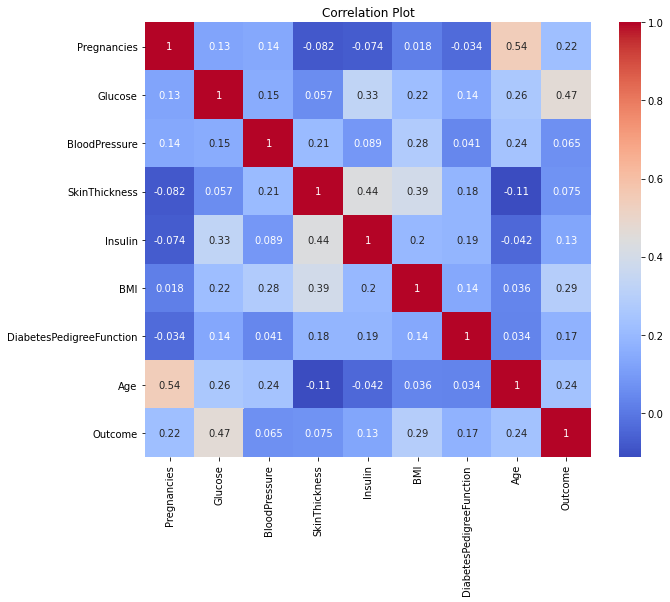

In [9]:
# Visualize correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Plot")
plt.show()

Training accuracy: 1.000
Testing accuracy: 0.760
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



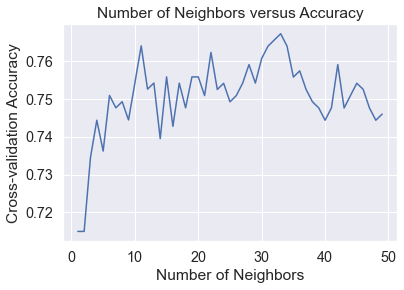

Best number of neighbors: 33


In [26]:
# Split the data into X (features) and y (target variable)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
cv_scores = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
best_k = np.argmax(cv_scores) + 1

# Train the KNN model with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = knn.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing set
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")

# Print the classification report
print(classification_report(y_test, y_test_pred))


# Plot the number of neighbors versus accuracy
plt.plot(range(1, 50), cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validation Accuracy')
plt.title('Number of Neighbors versus Accuracy')
plt.show()

print("Best number of neighbors:", best_k)

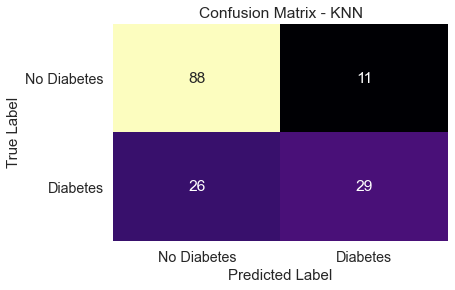

In [25]:
# Import metrics from sklearn 
from sklearn import metrics
# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - KNN")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No Diabetes", "Diabetes"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No Diabetes", "Diabetes"], rotation=0)
plt.show()

{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Accuracy:  0.7597402597402597
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



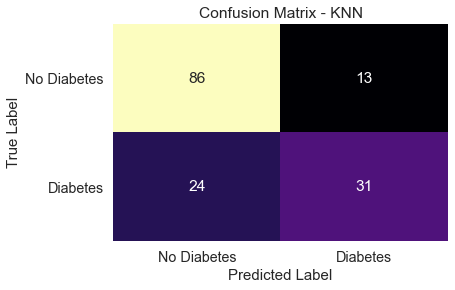

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define parameter grid
param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3, 4, 5],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# create KNN model
knn = KNeighborsClassifier()

# create GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# predict on the test set with the best hyperparameters
y_pred = grid_search.predict(X_test)

# print accuracy score and classification report
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(confusion_matrix)
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot=True,
            fmt="g",
            ax=ax,
            cmap="magma",
            cbar=False)
ax.set_title("Confusion Matrix - KNN")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No Diabetes", "Diabetes"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No Diabetes", "Diabetes"], rotation=0)
plt.show()
